In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
dataFrame= pd.read_excel("merc.xlsx")

In [4]:
dataFrame.head()
#içeriği hakkında bilgi sahibi olduk

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [5]:
dataFrame.describe()
#veriyi detaylıca anlayalım

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [6]:
dataFrame.isnull()
#boş veri var mı ?

,year,price,transmission,mileage,tax,mpg,engineSize
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13114,False,False,False,False,False,False,False
13115,False,False,False,False,False,False,False
13116,False,False,False,False,False,False,False
13117,False,False,False,False,False,False,False


In [7]:
dataFrame.isnull().sum()
#çok fazla veri olduğu için sonuna .sum yazıp kolayca null olup olmadığını gördük

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\bjk_a\anaconda3\envs\Samed\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

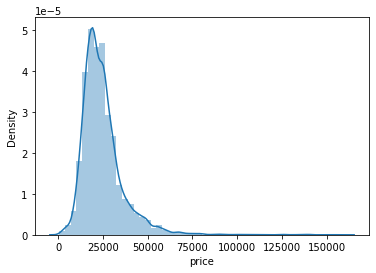

In [8]:
sbn.distplot(dataFrame["price"])
#fiyat sütunu için bir dağılım grafiği çıkarttık
#grafik sağa doğru fazla uzamış (pahalı arabalar var fakat sayıları az)

C:\Users\bjk_a\anaconda3\envs\Samed\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

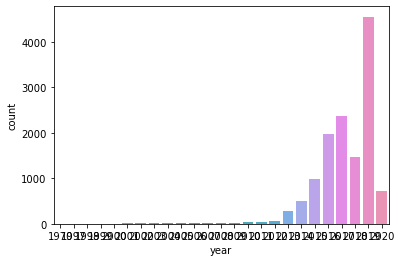

In [9]:
sbn.countplot(dataFrame["year"])
#countplot ile bir şeyin kaç sayıda olduğunu görebiliriz

In [10]:
dataFrame.corr()
#verilerin birbiri arasında ki korelasyona bakalım

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [11]:
dataFrame.corr()["price"]
#sadece price ı getirdi

year          0.520712
price         1.000000
mileage      -0.537214
tax           0.268717
mpg          -0.438445
engineSize    0.516126
Name: price, dtype: float64

In [12]:
dataFrame.corr()["price"].sort_values()
#artık etkilerini sırayla getiriyor.Ne kadar yüksekse fiyata o kadar + etki yapıyor
#mesela yıl arttıkça fiyat artıyor, milage arttıkça fiyat azalıyor

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

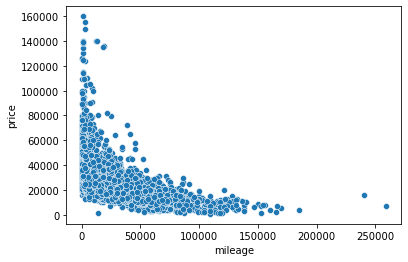

In [13]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame)
#fiyat ve km arasında ki görsel grafik

In [14]:
dataFrame.sort_values("price",ascending=False).head(20)
#en yüksek fiyatlı 20 arabayı gösterdi

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [15]:
dataFrame.sort_values("price",ascending=True).head(20)
#en ucuz fiyatlı 20 arabayı gösterdi
#ascending yükselen demektir

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [16]:
len(dataFrame)
#13119 tane araba var

13119

In [17]:
len(dataFrame)* 0.01
#bir verinin %99 unu alalım, yani en pahalı %1 arabayı (131 araba)yı çıkaralım

131.19

In [18]:
dataFrame2=dataFrame.sort_values("price",ascending=False).iloc[131:]
#.iloc ile indexe göre yerini buluyoruz
#131 ve sonrasını getireceği için en pahalı 131 araba burada olma

In [19]:
dataFrame2.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\bjk_a\anaconda3\envs\Samed\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

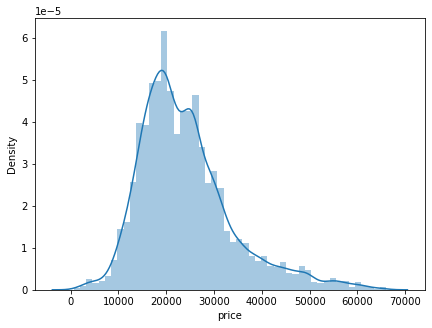

In [20]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame2["price"])
#dağılım artık daha normal görünüyor

In [21]:
dataFrame.describe()
#asıl dataframe bozulmadı, hala duruyor

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [22]:
dataFrame.groupby("year").mean()["price"]
#dataframei yıllara göre bulup ortalama fiyatlarını buluyor

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [23]:
dataFrame2.groupby("year").mean()["price"]
#iki verimde de 1970 de çok pahalıya satılan ve veri dağılımını bozan bir veri var

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [24]:
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]
#yılı 1970 olan varsa gösterme anlamına gelir

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [25]:
dataFrame = dataFrame2

In [26]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [27]:
dataFrame = dataFrame[dataFrame.year != 1970]
#artık 1970 yılı olanlar gözükmeyecek

In [28]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [29]:
dataFrame.head()
#transmissionda sayısal bir değer olmadığı için regresyona sokarsam hata verir
#zaten tablolarda da bu özellik gözükmüyordu dikkat ettiysen
#

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [30]:
dataFrame=dataFrame.drop("transmission",axis=1)

In [31]:
y = dataFrame["price"].values 
#dataframeden fiyat bilgilerini alıp . values diyerek numpy dizisine çevirdim
x=dataFrame.drop("price",axis=1).values
#dataframeden fiyatı atıp kalan özellikleri x eşitleyip numpy dizisi yaptım

In [32]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [33]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [34]:
from sklearn.model_selection import train_test_split
# x/y train/test gibi x ve y dizilerini eğiteceğimiz/test edecğimiz diziye bölmesi için train_test_spliti çağırdık

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [36]:
len(x_train)

9090

In [37]:
len(x_test)

3897

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
x_train = scaler.fit_transform(x_train)
#aynı satırda hem fit hem de transform ettik

In [41]:
x_test = scaler.transform(x_test)

In [42]:
from tensorflow.keras.models import Sequential #bununla model
from tensorflow.keras.layers import Dense #bununla da katman oluşturulur
#dense layer bütün nöronların outputların birbirine bağlı olduğu katman çeşidi

In [43]:
x_train.shape
#9090 tane veri,5 adet özellik var
#katmanları 5 ten başlatmak iyi olur ama daha fazla da tabii ki konulabilir
#çok veri olduğu için 12 tane nöron koyalım

(9090, 5)

In [44]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
#12 nöronlu 4 katman ekledim

model.add(Dense(1))
#1 tane çıkış katmanı koydum(bundan activation functiona gerek yok)

model.compile(optimizer="adam",loss="mse")
#optimizer olarak adam seçtim (en iyi performans veren)
#loss olarak yine mean square error (mse) kullandım

In [45]:
#şimdi modeli eğitelim

model.fit(x=x_train, y=y_train,validation_data=(x_test,y_test),batch_size=250, epochs=300)
#validation (doğrulama) verisini modelin içine verdik (daha eğitilirken valide ediliyor))
#x test ve y testi tuple olarak verdik (validation için)
#batch size ile verileri 250şer 250şer veriyor modele (modele bir anda yüklenmiyor)

Epoch 1/300
37/37 [==============================] - 0s 4ms/step - loss: 672127552.0000 - val_loss: 688072320.0000
Epoch 2/300
37/37 [==============================] - 0s 813us/step - loss: 672071040.0000 - val_loss: 687976448.0000
Epoch 3/300
37/37 [==============================] - 0s 912us/step - loss: 671899264.0000 - val_loss: 687676224.0000
Epoch 4/300
37/37 [==============================] - 0s 984us/step - loss: 671358784.0000 - val_loss: 686748224.0000
Epoch 5/300
37/37 [==============================] - 0s 805us/step - loss: 669836928.0000 - val_loss: 684330432.0000
Epoch 6/300
37/37 [==============================] - 0s 831us/step - loss: 666173120.0000 - val_loss: 678825792.0000
Epoch 7/300
37/37 [==============================] - 0s 778us/step - loss: 658288896.0000 - val_loss: 667570432.0000
Epoch 8/300
37/37 [==============================] - 0s 766us/step - loss: 643108032.0000 - val_loss: 646987712.0000
Epoch 9/300
37/37 [==============================] - 0s 834us/step

37/37 [==============================] - 0s 795us/step - loss: 62000192.0000 - val_loss: 63377008.0000
Epoch 72/300
37/37 [==============================] - 0s 776us/step - loss: 61468336.0000 - val_loss: 62811072.0000
Epoch 73/300
37/37 [==============================] - 0s 787us/step - loss: 60903636.0000 - val_loss: 62276632.0000
Epoch 74/300
37/37 [==============================] - 0s 773us/step - loss: 60329740.0000 - val_loss: 61685752.0000
Epoch 75/300
37/37 [==============================] - 0s 751us/step - loss: 59751444.0000 - val_loss: 61129024.0000
Epoch 76/300
37/37 [==============================] - 0s 807us/step - loss: 59173008.0000 - val_loss: 60539072.0000
Epoch 77/300
37/37 [==============================] - 0s 795us/step - loss: 58586476.0000 - val_loss: 59948256.0000
Epoch 78/300
37/37 [==============================] - 0s 771us/step - loss: 57984960.0000 - val_loss: 59355736.0000
Epoch 79/300
37/37 [==============================] - 0s 783us/step - loss: 57373352.

37/37 [==============================] - 0s 759us/step - loss: 23833876.0000 - val_loss: 24843002.0000
Epoch 142/300
37/37 [==============================] - 0s 809us/step - loss: 23731236.0000 - val_loss: 24740286.0000
Epoch 143/300
37/37 [==============================] - 0s 973us/step - loss: 23618668.0000 - val_loss: 24641020.0000
Epoch 144/300
37/37 [==============================] - 0s 895us/step - loss: 23519266.0000 - val_loss: 24554396.0000
Epoch 145/300
37/37 [==============================] - 0s 771us/step - loss: 23439196.0000 - val_loss: 24456016.0000
Epoch 146/300
37/37 [==============================] - 0s 842us/step - loss: 23347382.0000 - val_loss: 24372912.0000
Epoch 147/300
37/37 [==============================] - 0s 861us/step - loss: 23275726.0000 - val_loss: 24290518.0000
Epoch 148/300
37/37 [==============================] - 0s 1ms/step - loss: 23190960.0000 - val_loss: 24213986.0000
Epoch 149/300
37/37 [==============================] - 0s 1ms/step - loss: 23098

37/37 [==============================] - 0s 913us/step - loss: 20333052.0000 - val_loss: 21789976.0000
Epoch 212/300
37/37 [==============================] - 0s 925us/step - loss: 20363156.0000 - val_loss: 21677492.0000
Epoch 213/300
37/37 [==============================] - 0s 966us/step - loss: 20297822.0000 - val_loss: 21649606.0000
Epoch 214/300
37/37 [==============================] - 0s 856us/step - loss: 20267684.0000 - val_loss: 21667602.0000
Epoch 215/300
37/37 [==============================] - 0s 889us/step - loss: 20273284.0000 - val_loss: 21634184.0000
Epoch 216/300
37/37 [==============================] - 0s 751us/step - loss: 20222612.0000 - val_loss: 21625120.0000
Epoch 217/300
37/37 [==============================] - 0s 881us/step - loss: 20221172.0000 - val_loss: 21588770.0000
Epoch 218/300
37/37 [==============================] - 0s 925us/step - loss: 20174250.0000 - val_loss: 21652774.0000
Epoch 219/300
37/37 [==============================] - 0s 948us/step - loss: 2

37/37 [==============================] - 0s 1ms/step - loss: 19110248.0000 - val_loss: 20619250.0000
Epoch 282/300
37/37 [==============================] - 0s 1ms/step - loss: 19090634.0000 - val_loss: 20607618.0000
Epoch 283/300
37/37 [==============================] - 0s 927us/step - loss: 19088870.0000 - val_loss: 20610378.0000
Epoch 284/300
37/37 [==============================] - 0s 874us/step - loss: 19109402.0000 - val_loss: 20603866.0000
Epoch 285/300
37/37 [==============================] - 0s 843us/step - loss: 19076446.0000 - val_loss: 20575422.0000
Epoch 286/300
37/37 [==============================] - 0s 857us/step - loss: 19081696.0000 - val_loss: 20574162.0000
Epoch 287/300
37/37 [==============================] - 0s 829us/step - loss: 19036028.0000 - val_loss: 20545744.0000
Epoch 288/300
37/37 [==============================] - 0s 920us/step - loss: 19036436.0000 - val_loss: 20528484.0000
Epoch 289/300
37/37 [==============================] - 0s 993us/step - loss: 19012

In [46]:
kayip_verisi = pd.DataFrame(model.history.history)

In [47]:
kayip_verisi.head()
# hem normal kaybı hem de doğrulama kaybını veriyr yani kıyaslayabiliriz

,loss,val_loss
0,672127552.0,688072320.0
1,672071040.0,687976448.0
2,671899264.0,687676224.0
3,671358784.0,686748224.0
4,669836928.0,684330432.0


<AxesSubplot:>

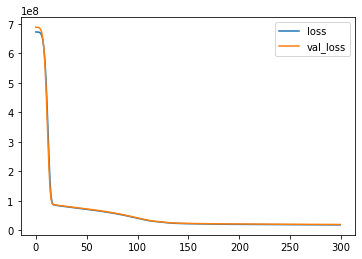

In [48]:
kayip_verisi.plot()
#burada bu 2 eğri ileride birbirinden ayrılıyorsa (mavi aşağı turuncu yukarı)
#overfitting vardır. epochsu azaltmak modeli baştan kurmak vb lazımdır
#bu tablo doğru ve güzel bir tablodur

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
tahmin_dizisi = model.predict(x_test)

In [51]:
tahmin_dizisi
#bunlar bizim tahmin değerlerimiz

array([[22489.783],
       [23491.357],
       [25236.475],
       ...,
       [26496.76 ],
       [12737.383],
       [24891.738]], dtype=float32)

In [52]:
mean_absolute_error(y_test,tahmin_dizisi)
#gerçek değerler ve tahminlerim arasında 3232 pound bir absolute fark var

3225.741641644915

In [53]:
dataFrame.describe()
#24 binlik ortalama değerde 3k civarı sapma var.
#bu aslında %13 lük bir fark eder ki bu fazladır
#bu kabul edilemezse 1-veriyi daha fazla temizleyebiliriz
#2-test_size split size değiştirilebilir
#3-epochsu arttırabiliriz
#4-nöron veya katman sayımızı arttırabilir/değiştirebiliriz

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


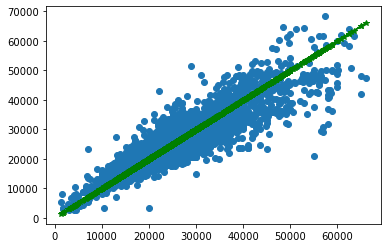

In [54]:
plt.scatter(y_test,tahmin_dizisi)
plt.plot(y_test,y_test,"g-*")
#scatter edip ortadan da bir çizgi çektirdik, sapmalar vat fakat düzgün görünüyor

In [55]:
dataFrame.iloc[2]
#2 indexli (yani 3. eleman) veriyi getirelim

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [56]:
yeni_araba_series = dataFrame.drop("price",axis=1).iloc[2]
#az önce bulduğumuz 65980 fiyatlı arabayı çıkarttım

In [57]:
yeni_araba_series = scaler.transform(yeni_araba_series.values.reshape(-1,5))
#numpy dizisi haline getirdik oluşturduğumuz seriyi
#eşit büyüklük olması için reshape t

In [60]:
model.predict(yeni_araba_series)
#bu eklediğim yeni arabanın değerini tahmin etti
#arabanın asıl değeri 65980 pound iken bizim tahminimiz 61619 pound

array([[62637.383]], dtype=float32)